In [1]:
import os
import pandas as pd


In [2]:
model_name = sorted(os.listdir('trained_models/reinforcement_learning'))[-1]
df = pd.read_csv(f'trained_models/reinforcement_learning/{model_name}/progress.txt', sep='\t').set_index('Epoch')

In [3]:
df.sample()

,AverageEpRet,StdEpRet,MaxEpRet,MinEpRet,EpLen,AverageVVals,StdVVals,MaxVVals,MinVVals,TotalEnvInteracts,LossPi,LossV,DeltaLossPi,DeltaLossV,Entropy,KL,ClipFrac,StopIter,Time
Epoch,,,,,,,,,,,,,,,,,,,
1612,29.8,75.83542,100.0,-72.0,895.1,1.01774,9.075429,19.25508,-38.825165,16130000,-8.692344e-09,32.0268,-0.008733,-6.825597,0.576703,0.015371,0.09921,10.0,35214.59998


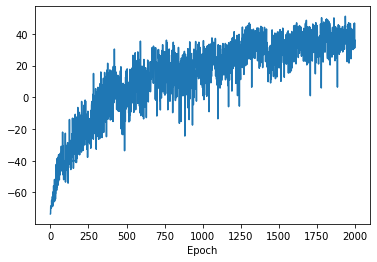

In [4]:
_ = df.AverageEpRet.plot()

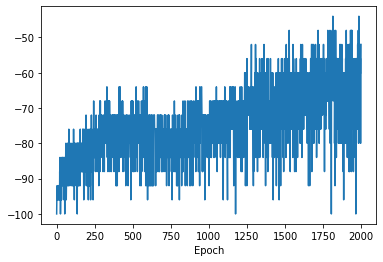

In [5]:
_ = df.MinEpRet.plot()

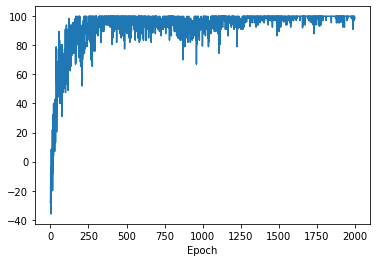

In [6]:
_ = df.MaxEpRet.plot()

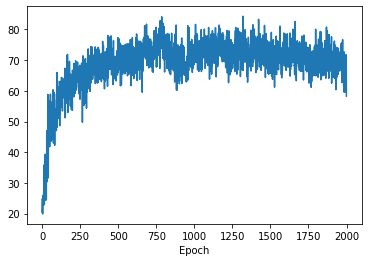

In [7]:
_ = df.StdEpRet.plot()

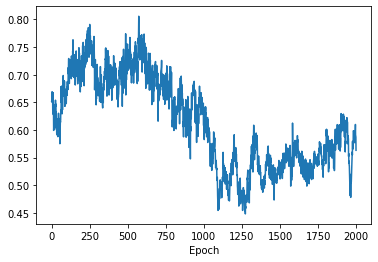

In [8]:
_ = df.Entropy.plot()

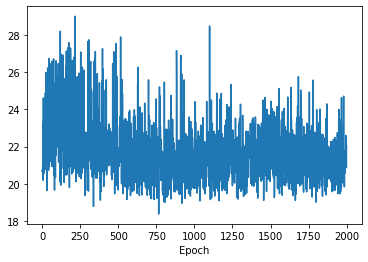

In [9]:
_ = df.Time.diff(1).plot()